In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pytest_dir = '/content/gdrive/My Drive/pytest/'
chat_dir = '/content/gdrive/My Drive/pytest/data/'
print('pytest_dir:', pytest_dir)
print('chat_dir:', chat_dir)

pytest_dir: /content/gdrive/My Drive/pytest/
chat_dir: /content/gdrive/My Drive/pytest/data/


In [3]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install JPype1
!pip install rhinoMorph

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,031 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.u

In [4]:
embedding_dim=50

with open(pytest_dir+'wiki_test.txt','r',encoding='utf-8') as f:
  data=f.read()

In [5]:
data

Output hidden; open in https://colab.research.google.com to view.

In [6]:
import rhinoMorph
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

sent_data=sent_tokenize(data)
rn=rhinoMorph.startRhino()

print('type: ', type(sent_data))
print('length: ', len(sent_data))
print('sentence sample: ', sent_data[:20])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!
type:  <class 'list'>
length:  11977
sentence sample:  ['<doc id="5" url="https://ko.wikipedia.org/wiki?curid=5" title="지미 카터">\n지미 카터\n\n제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.', '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.', '조지아 공과대학교를 졸업하였다.', '그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다.', '1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다.', '그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.', '1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다.', '대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다.', '조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.', '1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.', '카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.', '카터는 이집트와 이스라엘을 조정하여, 캠프 데이비드에서 안와르 사다트 대통령과 메나헴 베긴 수상과 함께 중동 평화를 위한 캠프데이비드 협정을 체결했다.', '그러나 이것은 공화당과 미국의 유대인 단체의 반발을 일으켰다.', '1979년 백악관에서 양국 

In [7]:
import os

exists=os.path.exists(chat_dir+'word2vec')
if not exists:
  os.mkdir(chat_dir+'word2vec')
  print("created")

In [8]:
total_lines=len(sent_data)
cnt=0

with open(chat_dir+'word2vec/wiki_test_morphed.txt','w',encoding='utf-8') as f:
  for data_each in sent_data:
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:
      f.write(joined_data_each + '\n')
    cnt += 1
    if (cnt % 1000) == 0: # 진행 정도 확인을 위해 1000번째 문장마다 확인
      print(round(cnt/total_lines * 100, 3), '%')
  print('Morphological Analysis Completed.')


8.349 %
16.699 %
25.048 %
33.397 %
41.747 %
50.096 %
58.445 %
66.795 %
75.144 %
83.493 %
91.843 %
Morphological Analysis Completed.


In [9]:
def read_data(filename, encoding='utf-8'): # 읽기 함수 정의
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split(' ') for line in f.read().splitlines()]
  return data
data=read_data(chat_dir+"word2vec/wiki_test_morphed.txt", 'utf-8')

print(len(data))
print(type(data))
print(data[:3])


11976
<class 'list'>
[['URL', '미', '카터', '미', '카터', '제임스', '얼', '미', '카터', '주니어', '민주당', '출신', '미국', '대통령'], ['미', '카터', '조지아', '섬터', '카운티', '마을', '태어나'], ['조지아', '공과대학', '교', '졸업']]


In [10]:
from gensim.models import Word2Vec
os.chdir(chat_dir+'word2vec/')

model = Word2Vec(sentences=data, size=embedding_dim, window=10, min_count=5, workers=4, sg=1)
model.save('embedding_window10_mincnt5_skipgram.model')
print('Completed.')

Completed.


In [11]:
words=list(model.wv.vocab)
words

['미',
 '카터',
 '얼',
 '민주당',
 '출신',
 '미국',
 '대통령',
 '조지아',
 '마을',
 '태어나',
 '공과대학',
 '교',
 '졸업',
 '그',
 '후',
 '해군',
 '들어가',
 '원자력',
 '잠수함',
 '일하',
 '대위',
 '이후',
 '등',
 '가꾸',
 '많',
 '돈',
 '벌',
 '별명',
 '농부',
 '알리',
 '주',
 '상원',
 '의원',
 '선거',
 '낙선',
 '부정선거',
 '입증',
 '되',
 '당선',
 '지사',
 '역임',
 '저',
 '두',
 '연임',
 '근무',
 '주지사',
 '지내',
 '살',
 '흑인',
 '법',
 '내세우',
 '후보',
 '출마',
 '정책',
 '누르',
 '에너지',
 '개발',
 '촉구',
 '공화당',
 '반대',
 '무산',
 '이집트',
 '이스라엘',
 '조정하',
 '메',
 '베',
 '수상',
 '함께',
 '중동',
 '평화',
 '위하',
 '협정',
 '체결',
 '그러나',
 '이것',
 '단체',
 '반발',
 '일으키',
 '백악관',
 '양국',
 '이끌',
 '또한',
 '소련',
 '전략',
 '무기',
 '제한',
 '협상',
 '하',
 '후반',
 '당시',
 '대한민국',
 '인권',
 '후진국',
 '국민',
 '지키',
 '노력',
 '취임',
 '계속',
 '도덕',
 '정치',
 '조선일보',
 '인터뷰',
 '기사',
 '박태준',
 '기자',
 '문화관광부',
 '전자',
 '표준화',
 '고',
 '민족',
 '문화',
 '연구원',
 '어절',
 '국립국어연구원',
 '배포',
 '불가',
 '원전',
 '파일',
 '전자파',
 '일화',
 '세기',
 '세종',
 '계획',
 '말뭉치',
 '구축',
 '문헌',
 '입력',
 '지침',
 '한국어',
 '표준어',
 '일',
 '입수',
 '프로젝트',
 '책임자',
 '김흥규',
 '한국언론연구원',
 '헤더',
 '붙이',
 '

In [12]:
with open('embedding_window10_mincnt5_skipgram.txt','w') as f:
  for word in words:
    data=model.wv[word].tolist()
    print('data_pre: ', data)
    data.insert(0, word)
    print('data_after: ', data)

    for item in data:
      f.write("%s " %item)
    f.write('\n')


Output hidden; open in https://colab.research.google.com to view.

In [13]:
model=Word2Vec.load('embedding_window10_mincnt5_skipgram.model')

print('--------유사단어 출력---------')
similarWords = model.wv.most_similar(positive=['행복', '웃음', '밝', '기쁨'], topn=5)
print(similarWords)
word = []
for similarWord in similarWords: # 유사도값을 제외하고 단어만 모은다
  word.append(similarWord[0])
print(word)

--------유사단어 출력---------
[('건너', 0.9791064262390137), ('일그러지', 0.9783667922019958), ('깜짝', 0.9767140746116638), ('따뜻하', 0.974328875541687), ('감동', 0.9712100028991699)]
['건너', '일그러지', '깜짝', '따뜻하', '감동']


In [14]:
print('--- 두 단어의 유사도 계산 ---')
print('한국과 일본:', model.wv.similarity('한국', '일본'))
print('한국과 미국:', model.wv.similarity('한국', '미국'))
print('한국과 중국:', model.wv.similarity('한국', '중국'))

--- 두 단어의 유사도 계산 ---
한국과 일본: 0.6430343
한국과 미국: 0.71603465
한국과 중국: 0.7330625


In [15]:
path="/content/gdrive/MyDrive/pytest/data/word2vec/"
model=Word2Vec.load(path+'embedding_window10_mincnt5_skipgram_big.model')

print('--------유사단어 출력---------')
similarWords = model.wv.most_similar(positive=['행복', '웃음', '밝', '기쁨'], topn=5)
print(similarWords)
word = []
for similarWord in similarWords: # 유사도값을 제외하고 단어만 모은다
  word.append(similarWord[0])
print(word)



--------유사단어 출력---------
[('흐뭇', 0.8909333348274231), ('마음', 0.8865163326263428), ('기쁘', 0.8699381351470947), ('마음속', 0.8504815101623535), ('즐겁', 0.8447961807250977)]
['흐뭇', '마음', '기쁘', '마음속', '즐겁']


In [16]:
print('--- 두 단어의 유사도 계산 ---')
print('한국과 일본:', model.wv.similarity('한국', '일본'))
print('한국과 미국:', model.wv.similarity('한국', '미국'))
print('한국과 중국:', model.wv.similarity('한국', '중국'))

--- 두 단어의 유사도 계산 ---
한국과 일본: 0.8515057
한국과 미국: 0.7342306
한국과 중국: 0.6941229


사전 훈련된 임베딩을 이용한 이진 분류

In [17]:
def read_data(filename, encoding='cp949'): # 읽기 함수 정의
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:] # 첫 행은 헤더(id document label)일 수 있으므로 제외
  return data
def write_data(data, filename, encoding='cp949'): # 쓰기 함수 정의
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

data = read_data(pytest_dir+'ratings.txt', encoding='cp949')

In [18]:
import rhinoMorph
rn = rhinoMorph.startRhino()
morphed_data = ''
for data_each in data:
  morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1],
    pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
  joined_data_each = ' '.join(morphed_data_each) # 문자열을 하나로 연결
  if joined_data_each: # 내용이 있는 경우만 저장하게 함 
    morphed_data += data_each[0]+"\t"+joined_data_each+"\t"+data_each[2]+"\n"
# 형태소 분석된 파일 저장
write_data(morphed_data, pytest_dir+'ratings_morphed.txt', encoding='cp949')

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [19]:
data = read_data(pytest_dir+'ratings_morphed.txt' , encoding='cp949')
print(type(data))
print(len(data))
print(len(data[0])) 
print(data[0])

<class 'list'>
197559
3
['8132799', '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사', '1']


In [20]:
import random
import math
import numpy as np
random.shuffle(data) # data를 랜덤하게 섞음
part_num = math.floor(len(data) * 1/3) # data의 1/3을 정수로 얻음
data = data[:part_num] # 앞에서부터 1/3 크기의 데이터만 선택
print(len(data)) 

65853


In [21]:
data_text = [line[1] for line in data] # 데이터 본문
data_senti = [line[2] for line in data] # 데이터 긍부정 부분
from sklearn.model_selection import train_test_split
train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(data_text, data_senti, stratify=data_senti)

In [22]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq:', train_data_senti_freq)
test_data_senti_freq = Counter(test_data_senti)
print('test_data_senti_freq:', test_data_senti_freq)

train_data_senti_freq: Counter({'1': 24824, '0': 24565})
test_data_senti_freq: Counter({'1': 8275, '0': 8189})


In [23]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math
max_words = 10000 # 데이터셋에서 가장 빈도 높은 10,000 개의 단어만 사용
maxlen = 20 # 20개 이후의 단어는 버려 각 문장의 길이를 고정
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text) # 단어 인덱스를 구축한다
word_index = tokenizer.word_index

In [24]:
word_index

{'영화': 1,
 '하': 2,
 '보': 3,
 '없': 4,
 '재미있': 5,
 'ㅋㅋ': 6,
 '좋': 7,
 '너무': 8,
 '되': 9,
 '정말': 10,
 '있': 11,
 '진짜': 12,
 '같': 13,
 '말': 14,
 '만들': 15,
 '나오': 16,
 '연기': 17,
 '최고': 18,
 '평점': 19,
 '다': 20,
 '안': 21,
 '이': 22,
 'ㅋ': 23,
 '알': 24,
 '왜': 25,
 '이런': 26,
 '스토리': 27,
 '잘': 28,
 '주': 29,
 '드라마': 30,
 '때': 31,
 '더': 32,
 '사람': 33,
 '가': 34,
 '배우': 35,
 '생각': 36,
 '지루': 37,
 '좀': 38,
 '아깝': 39,
 '내용': 40,
 '그냥': 41,
 '감독': 42,
 '재미': 43,
 '시간': 44,
 '재미없': 45,
 'ㅠㅠ': 46,
 '감동': 47,
 '쓰레기': 48,
 '다시': 49,
 '모르': 50,
 '작품': 51,
 '들': 52,
 '아': 53,
 '처음': 54,
 '마지막': 55,
 '그': 56,
 '액션': 57,
 '사랑': 58,
 '많': 59,
 '기대': 60,
 '못하': 61,
 '완전': 62,
 '정도': 63,
 '참': 64,
 '이야기': 65,
 '느끼': 66,
 '이렇게': 67,
 '최악': 68,
 '쓰': 69,
 '장면': 70,
 '남': 71,
 '별로': 72,
 '오': 73,
 '못': 74,
 '끝': 75,
 'ㅎㅎ': 76,
 '느낌': 77,
 '돈': 78,
 '10점': 79,
 '지금': 80,
 '역시': 81,
 '보이': 82,
 '무슨': 83,
 '그리고': 84,
 '명작': 85,
 '마음': 86,
 '이것': 87,
 '한국': 88,
 '주인공': 89,
 'ㅡㅡ': 90,
 '좋아하': 91,
 '또': 92,
 '안되': 93,
 'ㅠ': 

In [25]:
type(train_data_text)

list

In [26]:
data = tokenizer.texts_to_sequences(train_data_text) # 데이터에 Tokenizer 적용
print('data 0:', data[0:3])
print('texts 0:', train_data_text[0])

data 0: [[40, 258, 2, 512, 11, 865, 18], [23, 420, 474, 4175, 144, 33, 6, 2025, 66, 69, 222, 66, 69, 1, 54, 3, 6, 40, 12, 104, 1112, 778, 179, 1112, 145, 1112, 41, 376, 23, 1214, 236, 6, 23, 83, 280, 1, 252, 225, 90], [366, 3, 37, 686, 3, 172, 853, 103, 152]]
texts 0: 내용 부족 하 감 있 그래픽 최고


In [27]:
type(data)

list

In [28]:
data = pad_sequences(data, maxlen=maxlen) 
print('data:', data)
print('data 0:', data[0])
print('data 0의 길이:', len(data[0]))

data: [[   0    0    0 ...   11  865   18]
 [ 104 1112  778 ...  252  225   90]
 [   0    0    0 ...  853  103  152]
 ...
 [   0    0    0 ...  450   56 1172]
 [   0    0    0 ...   41  472 1434]
 [   0    0    0 ...   19 4010 4321]]
data 0: [  0   0   0   0   0   0   0   0   0   0   0   0   0  40 258   2 512  11
 865  18]
data 0의 길이: 20


In [29]:
type(data)

numpy.ndarray

In [30]:
print(data.shape)

(49389, 20)


In [31]:
labels = np.asarray(train_data_senti).astype('float32')

In [32]:
validation_ratio = 0.3 # 30%는 검증데이터로 사용한다. 나머지는 훈련데이터
validation_len = math.floor(len(train_data_text) * validation_ratio) 
x_train = data[validation_len:] # 훈련데이터의 70%는 훈련데이터
y_train = labels[validation_len:] # 훈련데이터의 70%는 훈련데이터 Label
x_val = data[:validation_len] # 훈련데이터의 30%는 검증데이터
y_val = labels[:validation_len] 

In [33]:
embeddings_index = {} 
f = open(os.path.join(chat_dir+'word2vec','embedding_window10_mincnt5_skipgram_big.txt'), encoding='cp949')
for line in f:
  values = line.split() # 텍스트 파일의 각 행을 분리
  word = values[0] # 각 행의 단어
  coefs = np.asarray(values[1:], dtype='float32') # 각 단어의 임베딩값
  embeddings_index[word] = coefs
f.close()
print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

143775개의 단어 벡터를 찾았습니다.


In [34]:
embedding_matrix=np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i<max_words:
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
       embedding_matrix[i] = embedding_vector

In [35]:
class_number = 1
epochs = 5
batch_size = 32
embedding_dim = 50
model_name = 'text_binary_model.h5'
tokenizer_name = 'text_binary_tokenizer.pickle'

In [36]:
from keras import models 
from keras import layers
model = models.Sequential()

In [37]:
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten()) 
model.add(layers.Dense(units=64, activation='relu')) # 은닉층
model.add(layers.Dense(units=32, activation='relu')) # 은닉층
model.add(layers.Dense(units=class_number, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 50)            500000    
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 64)                64064     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 566,177
Trainable params: 566,177
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

In [40]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [41]:
history = model.fit(x_train, y_train, epochs=epochs, 
batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)
history_dict = history.history

Epoch 1/5
1081/1081 [==============================] - 9s 5ms/step - loss: 0.5423 - acc: 0.7247 - val_loss: 0.5454 - val_acc: 0.7267
Epoch 2/5
1081/1081 [==============================] - 4s 3ms/step - loss: 0.4928 - acc: 0.7602 - val_loss: 0.5170 - val_acc: 0.7406
Epoch 3/5
1081/1081 [==============================] - 5s 4ms/step - loss: 0.4697 - acc: 0.7738 - val_loss: 0.5188 - val_acc: 0.7449
Epoch 4/5
1081/1081 [==============================] - 4s 3ms/step - loss: 0.4436 - acc: 0.7884 - val_loss: 0.5154 - val_acc: 0.7549
Epoch 5/5
1081/1081 [==============================] - 4s 3ms/step - loss: 0.4169 - acc: 0.8042 - val_loss: 0.5217 - val_acc: 0.7550


In [42]:
import pickle

model.save(model_name)
with open(tokenizer_name,'wb') as file:
  pickle.dump(tokenizer,file,protocol=pickle.HIGHEST_PROTOCOL)

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Train accuracy of each epoch:', np.round(acc, 3))
print('Validation accuracy of each epoch:', np.round(val_acc, 3))
epochs = range(1, len(val_acc) + 1)

Train accuracy of each epoch: [0.725 0.76  0.774 0.788 0.804]
Validation accuracy of each epoch: [0.727 0.741 0.745 0.755 0.755]


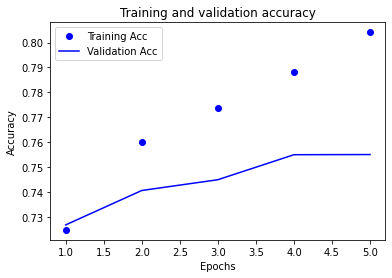

In [44]:
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
from keras.models import load_model

loaded_model=load_model(model_name)

with open('/content/gdrive/MyDrive/pytest/data/word2vec/text_binary_tokenizer.pickle','rb') as handle:
  loaded_tokenizer=pickle.load(handle)

In [46]:
data=loaded_tokenizer.texts_to_sequences(test_data_text)

In [47]:

data = tokenizer.texts_to_sequences(test_data_text) # 데이터에 Tokenizer 적용
data=pad_sequences(data, maxlen=maxlen)
x_test=data

In [48]:

y_test=np.asarray(test_data_senti).astype('float32')
type(y_test)

numpy.ndarray

In [49]:
print(x_train)
print(x_test)

[[   0    0    0 ...  373    1    4]
 [ 609   80    3 ...  777   45   50]
 [   0    0    0 ...    2  218   46]
 ...
 [   0    0    0 ...  450   56 1172]
 [   0    0    0 ...   41  472 1434]
 [   0    0    0 ...   19 4010 4321]]
[[   0    0    0 ...  149   40    4]
 [   0    0    0 ...   15    1   42]
 [   0    0    0 ...  133  168   37]
 ...
 [   0    0    0 ... 3933    3    2]
 [   0    0    0 ... 3001   64  230]
 [3025  892  693 ...  266   46   94]]


In [50]:
test_eval=loaded_model.evaluate(x_test, y_test)

515/515 [==============================] - 2s 3ms/step - loss: 0.5252 - acc: 0.7552


In [51]:
print('prediction modle loss & acc: ', test_eval)

prediction modle loss & acc:  [0.5252106189727783, 0.7552235126495361]


In [52]:
text=["재미있게 잘 봤습니다."]

text=[rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in text]

print("형태소 분석 결과: ", text)

형태소 분석 결과:  [['재미있', '잘', '보']]


In [53]:
data = loaded_tokenizer.texts_to_sequences(text)
print(data)
data = pad_sequences(data, maxlen=maxlen)
x_test = data
prediction = loaded_model.predict(x_test)
print("Result:", prediction)

[[5, 28, 3]]
Result: [[0.97558326]]


학습 데이터 임베딩을 이용한 이진 분류

In [86]:
def read_data(filename, encoding='cp949'): # 읽기 함수 정의
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:] # 첫 행은 헤더(id document label)일 수 있으므로 제외
  return data
def write_data(data, filename, encoding='cp949'): # 쓰기 함수 정의
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

data = read_data(pytest_dir+'ratings.txt', encoding='cp949')


data=read_data(pytest_dir+'ratings_morphed.txt', encoding='cp949')
print(len(data))

197559


In [87]:
import random
import math
import numpy as np
random.shuffle(data) # data를 랜덤하게 섞음
part_num = math.floor(len(data) * 1/2) # data의 1/3을 정수로 얻음
data = data[:part_num] # 앞에서부터 1/3 크기의 데이터만 선택
print(len(data)) 

98779


In [88]:
data_text = [line[1] for line in data] # 데이터 본문
data_senti = [line[2] for line in data] # 데이터 긍부정 부분
from sklearn.model_selection import train_test_split
train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(data_text, data_senti, stratify=data_senti)

In [89]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq:', train_data_senti_freq)
test_data_senti_freq = Counter(test_data_senti)
print('test_data_senti_freq:', test_data_senti_freq)

train_data_senti_freq: Counter({'0': 37053, '1': 37031})
test_data_senti_freq: Counter({'0': 12351, '1': 12344})


In [90]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math
max_words = 10000 # 데이터셋에서 가장 빈도 높은 10,000 개의 단어만 사용
maxlen = 20 # 20개 이후의 단어는 버려 각 문장의 길이를 고정
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text) # 단어 인덱스를 구축한다
word_index = tokenizer.word_index

In [91]:
print('wprd_index: ', word_index)

wprd_index:  {'영화': 1, '하': 2, '보': 3, '없': 4, 'ㅋㅋ': 5, '재미있': 6, '좋': 7, '너무': 8, '되': 9, '정말': 10, '있': 11, '진짜': 12, '같': 13, '만들': 14, '말': 15, '연기': 16, '나오': 17, '최고': 18, '평점': 19, '다': 20, '안': 21, 'ㅋ': 22, '이': 23, '왜': 24, '알': 25, '스토리': 26, '잘': 27, '이런': 28, '주': 29, '드라마': 30, '때': 31, '사람': 32, '더': 33, '배우': 34, '가': 35, '지루': 36, '생각': 37, '좀': 38, '내용': 39, '그냥': 40, '아깝': 41, '감독': 42, '재미': 43, '재미없': 44, '시간': 45, '감동': 46, 'ㅠㅠ': 47, '쓰레기': 48, '모르': 49, '다시': 50, '들': 51, '처음': 52, '작품': 53, '사랑': 54, '아': 55, '마지막': 56, '그': 57, '못하': 58, '참': 59, '기대': 60, '액션': 61, '완전': 62, '많': 63, '정도': 64, '이야기': 65, '느끼': 66, '이렇게': 67, '못': 68, '별로': 69, '느낌': 70, '장면': 71, '최악': 72, 'ㅎㅎ': 73, '남': 74, '무슨': 75, '쓰': 76, '10점': 77, '돈': 78, '지금': 79, '오': 80, '마음': 81, '끝': 82, '보이': 83, '명작': 84, '그리고': 85, 'ㅡㅡ': 86, '역시': 87, '이것': 88, '한': 89, '좋아하': 90, '또': 91, '많이': 92, 'ㅠ': 93, '한국': 94, '주인공': 95, '괜찮': 96, '여자': 97, '받': 98, '웃기': 99, '대하': 100, '안되': 101, '그렇': 

In [92]:
data = tokenizer.texts_to_sequences(train_data_text) # 데이터에 Tokenizer 적용
print('data 0:', data[0])
print('texts 0:', train_data_text[0])

data 0: [998, 1484, 1304, 854, 8793, 66, 1, 162, 1530, 525, 758, 7809, 52, 82, 2687, 9, 364, 428, 174, 145, 3308, 1]
texts 0: 한국인 일본인 성격 차이 격하 느끼 영화 슬프 대놓고 엄청나 슬 양화 처음 끝 과잉 되 감정 잔잔 계속 가슴 찌르 영화


In [93]:
data=pad_sequences(data, maxlen=maxlen)

In [94]:
print(data.shape)

(74084, 20)


In [95]:
labels=np.asarray(train_data_senti).astype('float32')

In [96]:
validation_ratio = 0.3 # 30%는 검증데이터로 사용한다. 나머지는 훈련데이터
validation_len = math.floor(len(train_data_text) * validation_ratio) 
x_train = data[validation_len:] # 훈련데이터의 70%는 훈련데이터
y_train = labels[validation_len:] # 훈련데이터의 70%는 훈련데이터 Label
x_val = data[:validation_len] # 훈련데이터의 30%는 검증데이터
y_val = labels[:validation_len] 

In [97]:
class_number = 1
epochs = 5
batch_size = 32
embedding_dim = 50
model_name = 'text_binary_model.h5'
tokenizer_name = 'text_binary_tokenizer.pickle'

In [98]:
from keras import models 
from keras import layers
model = models.Sequential()

In [99]:
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten()) 
model.add(layers.Dense(units=64, activation='relu')) # 은닉층
model.add(layers.Dense(units=32, activation='relu')) # 은닉층
model.add(layers.Dense(units=class_number, activation='sigmoid'))

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 50)            500000    
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                64064     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 566,177
Trainable params: 566,177
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [102]:
history = model.fit(x_train, y_train, epochs=epochs, 
batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)
history_dict = history.history

Epoch 1/5
1621/1621 [==============================] - 9s 5ms/step - loss: 0.4358 - acc: 0.7927 - val_loss: 0.3804 - val_acc: 0.8300
Epoch 2/5
1621/1621 [==============================] - 7s 4ms/step - loss: 0.3597 - acc: 0.8443 - val_loss: 0.3781 - val_acc: 0.8309
Epoch 3/5
1621/1621 [==============================] - 7s 4ms/step - loss: 0.3190 - acc: 0.8672 - val_loss: 0.4079 - val_acc: 0.8233
Epoch 4/5
1621/1621 [==============================] - 7s 4ms/step - loss: 0.2748 - acc: 0.8886 - val_loss: 0.4228 - val_acc: 0.8202
Epoch 5/5
1621/1621 [==============================] - 7s 4ms/step - loss: 0.2389 - acc: 0.9060 - val_loss: 0.4810 - val_acc: 0.8099


In [103]:
import pickle
model.save(model_name)

In [104]:
with open(tokenizer_name, 'wb') as file:
  pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)

In [105]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Train accuracy of each epoch:', np.round(acc, 3))
print('Validation accuracy of each epoch:', np.round(val_acc, 3))
epochs = range(1, len(val_acc) + 1)

Train accuracy of each epoch: [0.793 0.844 0.867 0.889 0.906]
Validation accuracy of each epoch: [0.83  0.831 0.823 0.82  0.81 ]


In [106]:
data = tokenizer.texts_to_sequences(test_data_text) # 데이터에 Tokenizer 적용
data=pad_sequences(data, maxlen=maxlen)
x_test=data

In [107]:
y_test=np.asarray(test_data_senti).astype("float32")

In [112]:
test_eval=loaded_model.evaluate(x_test, y_test)
print('prediction model loss&acc : ', test_eval)

772/772 [==============================] - 2s 2ms/step - loss: 0.8569 - acc: 0.5838
prediction model loss&acc :  [0.8569262027740479, 0.5838024020195007]
